# VOLTMETRO

OBIETTIVO: stimare la resistenza interna del voltmetro

PROCEDIMENTO: usando resistenze dell'ordine dei MΩ misuriamo la corrente di una resistenza equivalente data da $R_{eq} = \frac{R_v R}{Rv + R}$

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
import os
import sys

dir_path = os.path.abspath('')
sys.path.append(dir_path + '/../')

from interpolazione import Interpolazione

dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'voltmetro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(MOHM)']) * 10**6 #megaOHM
sigmaRpercent = 0.02 # 1%
sigmaR = R*sigmaRpercent

I = np.array(fr['uA']) * 10**-6 #microAmpere
sigmaIpercent = 0.01 # 1%
sigmaI = I*sigmaIpercent

V = 5.01 # mantenuta costante
sigmaVpercent = 0.01 # 1%
sigmaV = V*sigmaVpercent

In [39]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

dato che $V=RI \Rightarrow R(I) \propto \frac{1}{I} $

l'errore sulla R >> dell'errore su I $\Rightarrow$ disegno R(I)

In [51]:
def Rv_I(I,Rv): # V = 5.01
    return (I/V - 1/Rv)**-1

i = Interpolazione(I,R,Rv_I,sigmaR,p0=[10* 10**6]) # ordine 10MΩ
print(i)

   
Parameters: [10851602.12676205] 
Sigma parameters: [13601.36148619]

sigmaY: [ 20000.  30000.  40000.  50000.  60000.  70000.  80000.  90000. 100000.
 110000. 120000. 130000. 140000. 150000. 160000. 170000. 180000. 190000.
 200000. 210000.]

chiquadro ridotto: 0.07
df: 19
pvalue: 100.0%
covariance matrix: [[1.66959823e+08]]    



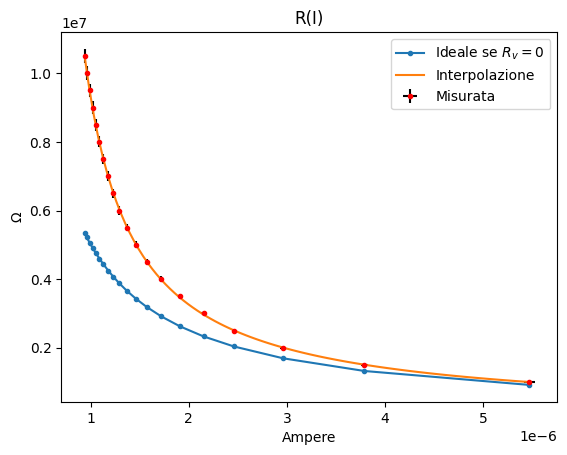

In [53]:
x = np.linspace(np.min(I),np.max(I),100)
y = Rv_I(x,i.bval[0])

plt.title('R(I)')
plt.errorbar(I,R,fmt='.',linestyle='None',xerr=sigmaI,yerr=sigmaR,label='Misurata',color='red',ecolor='black')
plt.plot(I,V/I,label='Ideale se $R_v = 0$',marker='.')
plt.plot(x,y,label='Interpolazione')
plt.xlabel('Ampere')
plt.ylabel('Ω')
plt.legend()
plt.show()

# R_v ottenuto deall'interpolazione:

In [44]:
print('Rv: ',final_val(i.bval[0],i.sigma_bval[0],exp=6,udm='Ω'))

Rv:  (10.85 ± 0.04)e6 Ω
